# Import des outils / jeu de données

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from column_names import id_col, quali_var, quanti_var, target
from config import seed

from src.playground_series.exploratory_analysis import (
    plot_correlation_matrix,
    plot_distributions_quali,
    plot_distributions_quanti,
    plot_na_quanti,
)
from src.utils import set_plot_options, set_seed

In [ ]:
set_seed(seed)
set_plot_options()

In [ ]:
df = pd.read_csv(
    "data/dataset/raw/train.csv",
    index_col=id_col,
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [ ]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [ ]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 19 variables et 7905 individus.


In [ ]:
for c in df.columns:
    print(f'"{c}",')

"N_Days",
"Drug",
"Age",
"Sex",
"Ascites",
"Hepatomegaly",
"Spiders",
"Edema",
"Bilirubin",
"Cholesterol",
"Albumin",
"Copper",
"Alk_Phos",
"SGOT",
"Tryglicerides",
"Platelets",
"Prothrombin",
"Stage",
"Status",


#### Variables

#### Conversion de type

In [ ]:
df[quali_var] = (
    df[quali_var].astype(str).astype("category")
)  # todo: convertir uniquement les variables INT en category

In [ ]:
X = df.copy()[quanti_var + quali_var]
y = df.copy()[target]

In [ ]:
df[quanti_var].head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
id,,,,,,,,,,,
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6


In [ ]:
df[quali_var].head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
id,,,,,,,
0,D-penicillamine,M,N,N,N,N,3.0
1,Placebo,F,N,N,N,N,3.0
2,Placebo,F,N,Y,Y,Y,4.0
3,Placebo,F,N,N,N,N,3.0
4,Placebo,F,N,Y,N,N,4.0


In [ ]:
df[target].head()

id
0    D
1    C
2    D
3    C
4    C
Name: Status, dtype: object

# Découverte des données

## Analyse univariée

In [ ]:
df.nunique()

N_Days           461
Drug               2
Age              391
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        111
Cholesterol      226
Albumin          160
Copper           171
Alk_Phos         364
SGOT             206
Tryglicerides    154
Platelets        227
Prothrombin       49
Stage              4
Status             3
dtype: int64

In [ ]:
df[quanti_var].describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000


In [ ]:
df[quali_var].describe()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
count,7905,7905,7905,7905,7905,7905,7905
unique,2,2,2,2,2,3,4
top,Placebo,F,N,Y,N,N,3.0
freq,4010,7336,7525,4042,5966,7161,3153


# Visualisation

## Variables quantitatives

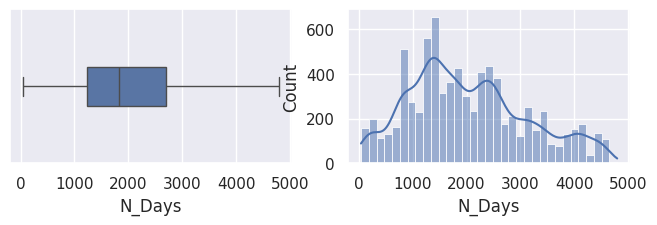

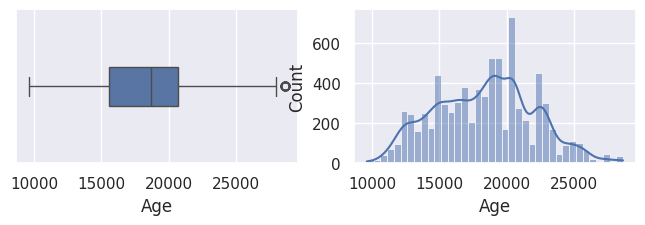

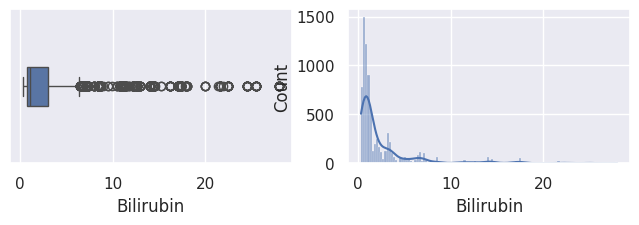

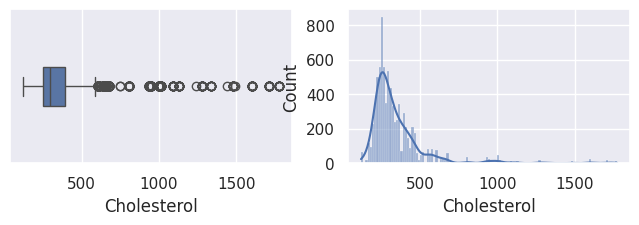

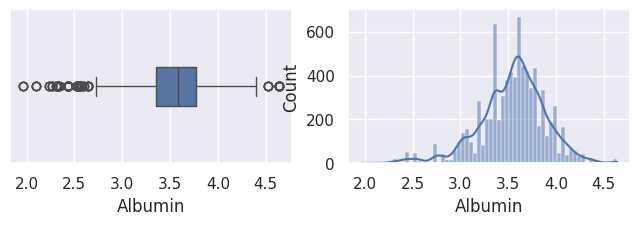

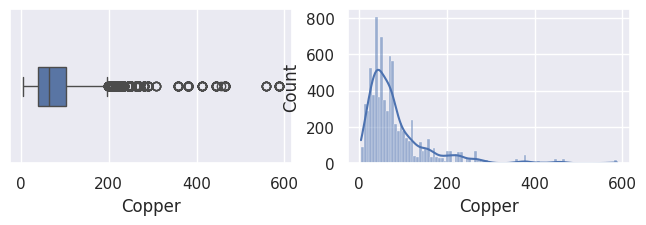

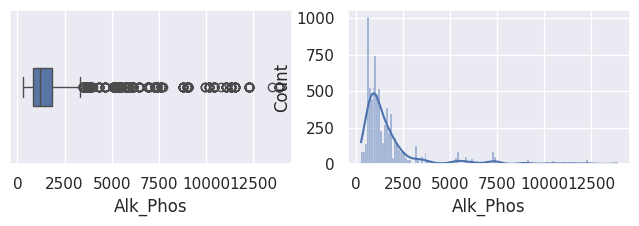

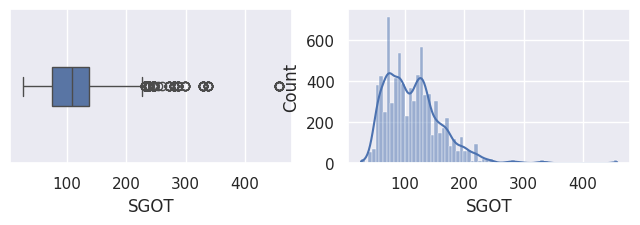

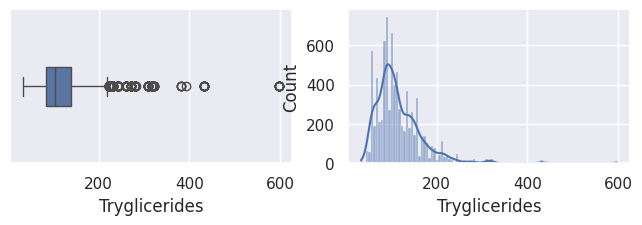

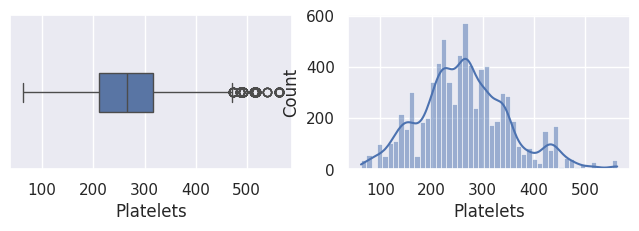

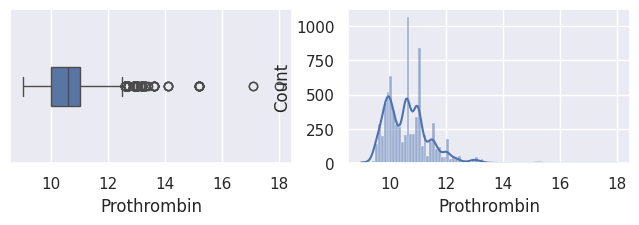

In [ ]:
plot_distributions_quanti(df[quanti_var])

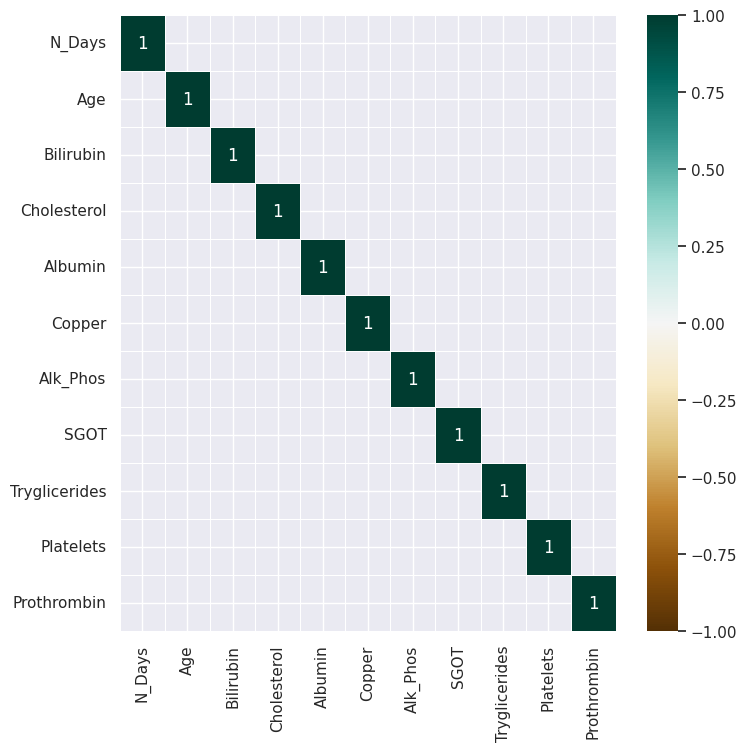

In [ ]:
plot_correlation_matrix(df[quanti_var])

### Valeurs manquantes

In [ ]:
plot_na_quanti(df[quanti_var])

There are no missing values.


## Variables qualitatives

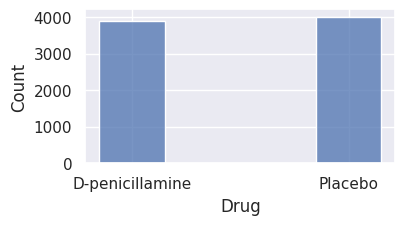

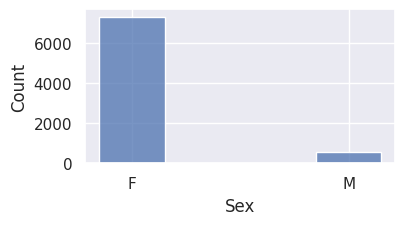

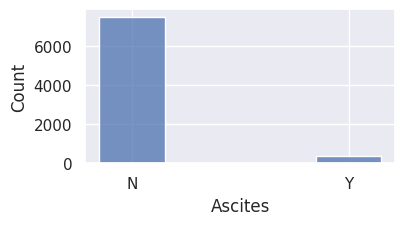

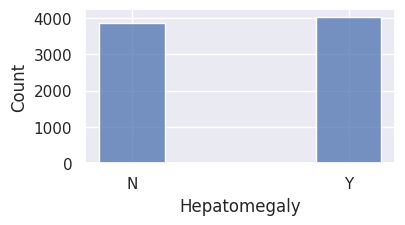

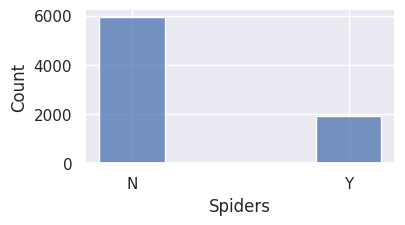

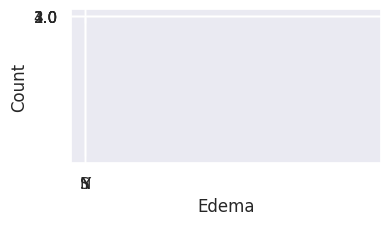

In [ ]:
plot_distributions_quali(df[quali_var])

### Valeurs manquantes

In [ ]:
df_na = df[quali_var].isna()
df_na_sum = df_na.sum()

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='id'>

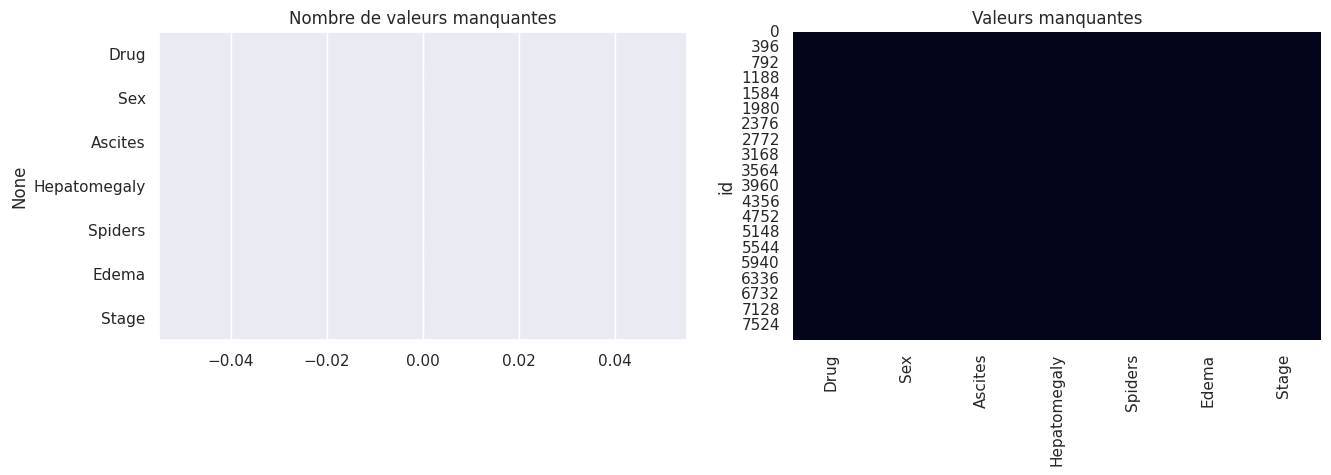

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
sns.barplot(x=df_na_sum.values, y=df_na_sum.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df_na, cbar=False, ax=ax[1])

In [ ]:
df_na_sum  # fixme: na are not detected because categories are converted as string I guess?

Urine protein     0
dental caries     0
hearing(left)     0
hearing(right)    0
dtype: int64

### Variable cible

In [ ]:
target_as_str = y.astype(str)

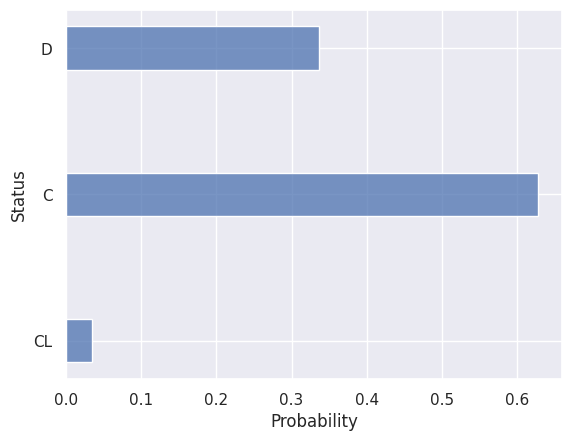

In [ ]:
sns.histplot(y=target_as_str, shrink=0.3, stat="probability")
plt.show()

In [ ]:
pd.concat((y.value_counts(), y.value_counts(normalize=True)), axis=1)

,Status,Status
C,4965,0.628083
D,2665,0.337128
CL,275,0.034788


## Variable cible en fonction des autres variables

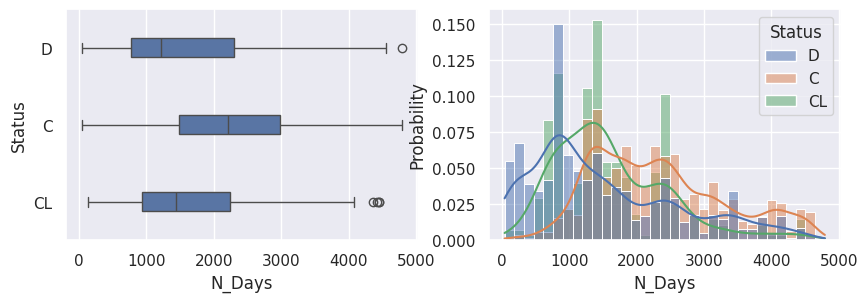

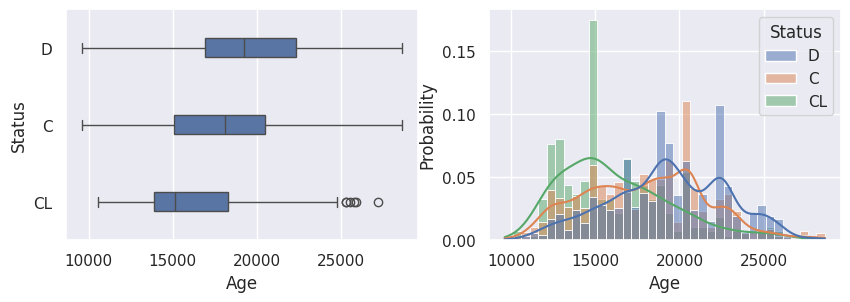

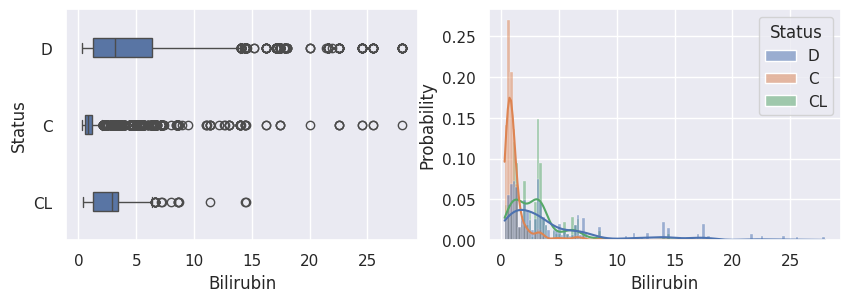

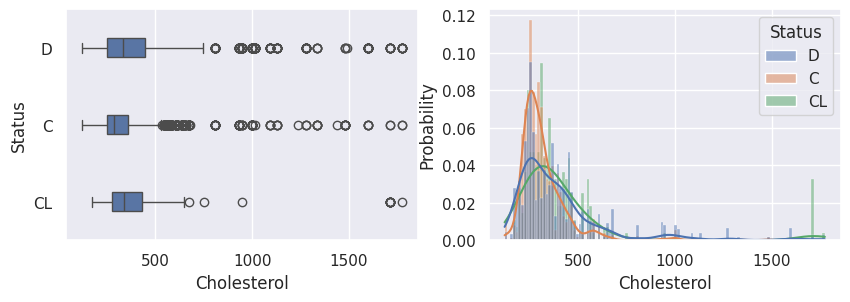

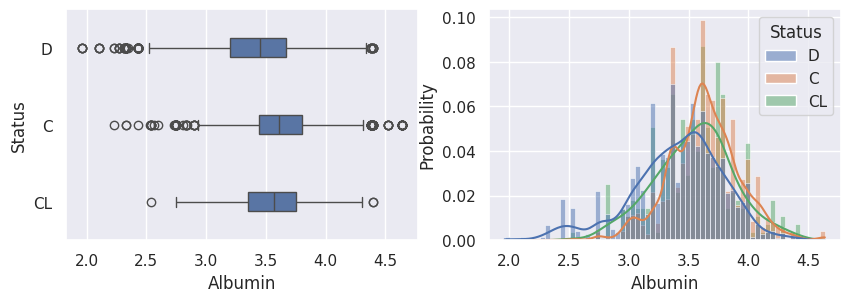

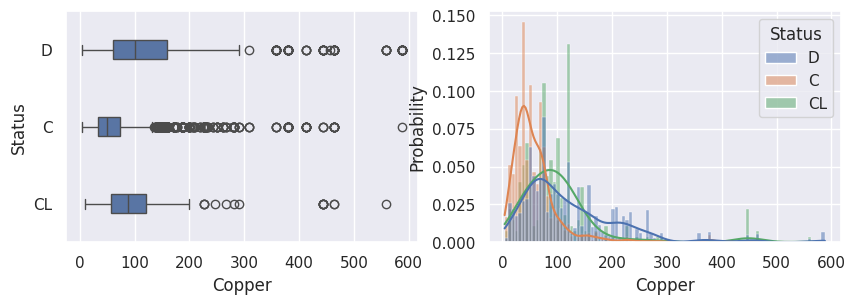

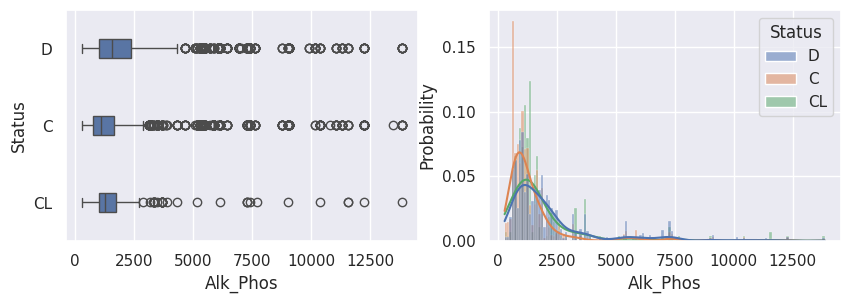

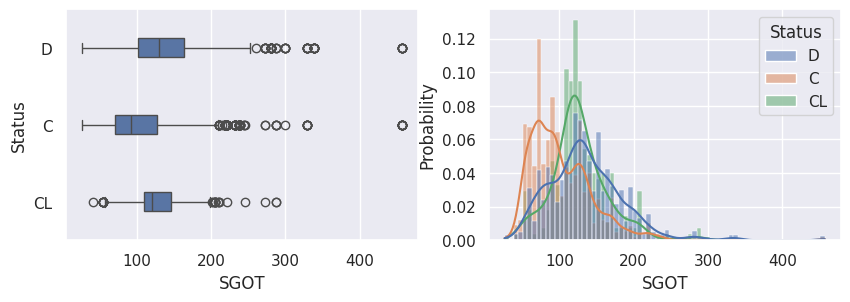

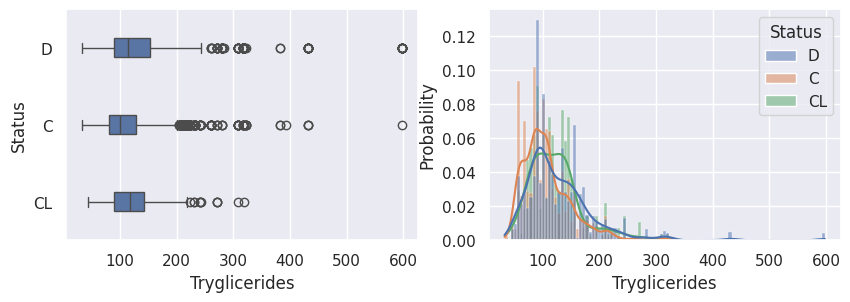

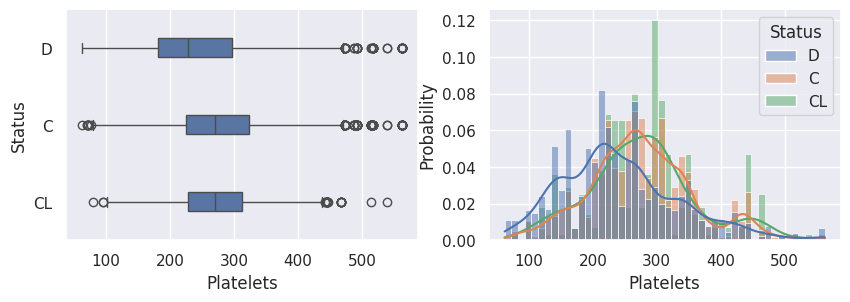

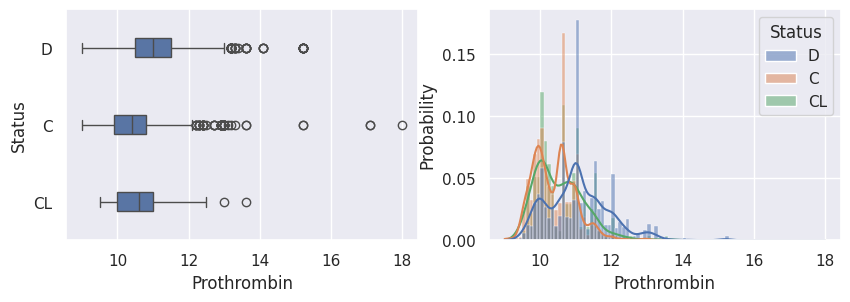

In [ ]:
for var in quanti_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.boxplot(df, x=df[var], y=target_as_str, width=0.25, ax=ax[0])

    sns.histplot(
        df,
        x=df[var],
        kde=True,
        ax=ax[1],
        hue=target_as_str,
        stat="probability",
        common_norm=False,
    )

    plt.show()

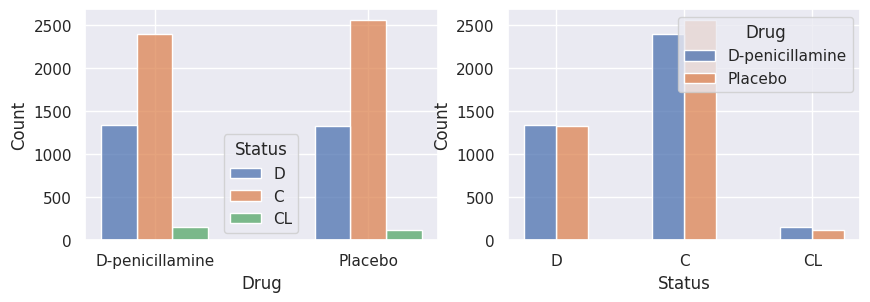

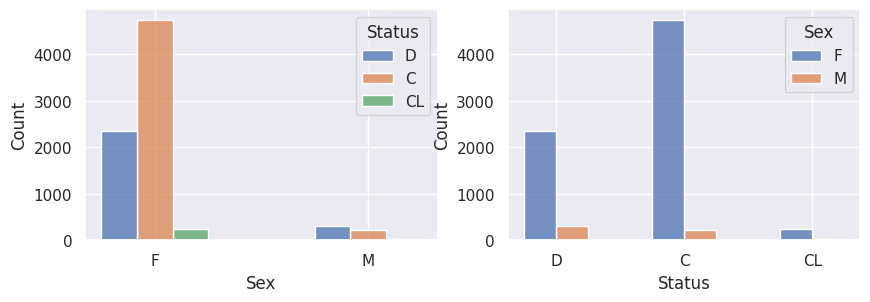

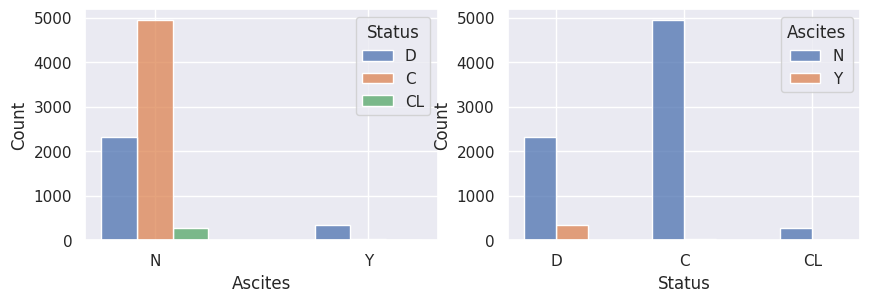

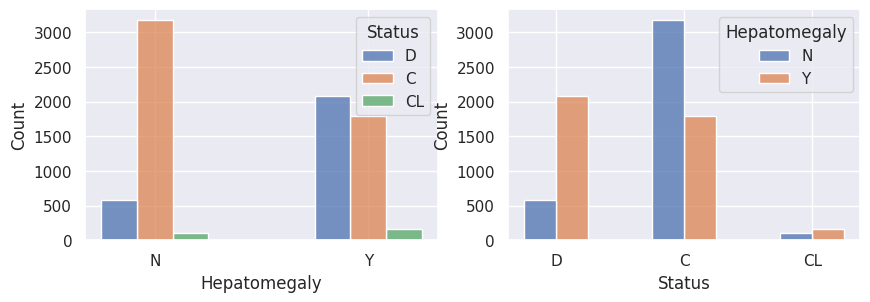

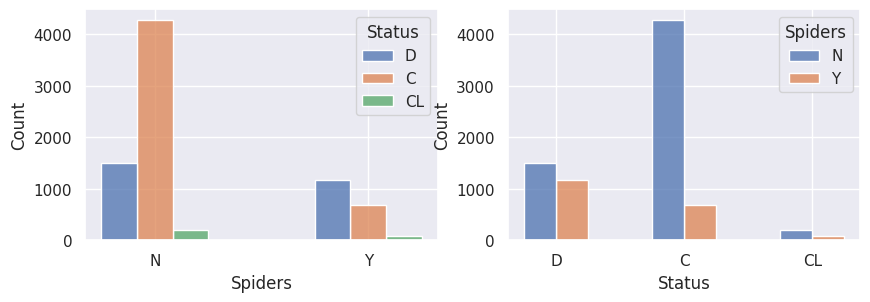

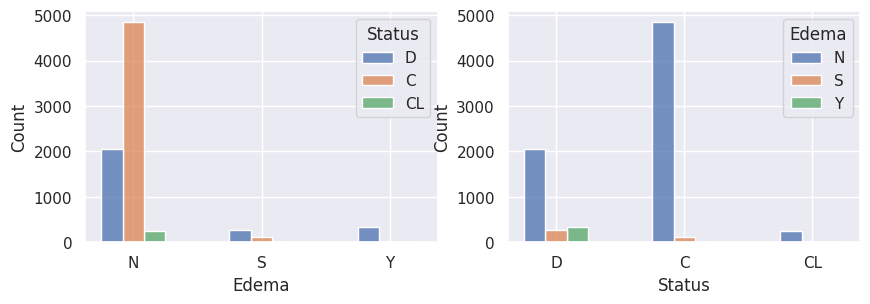

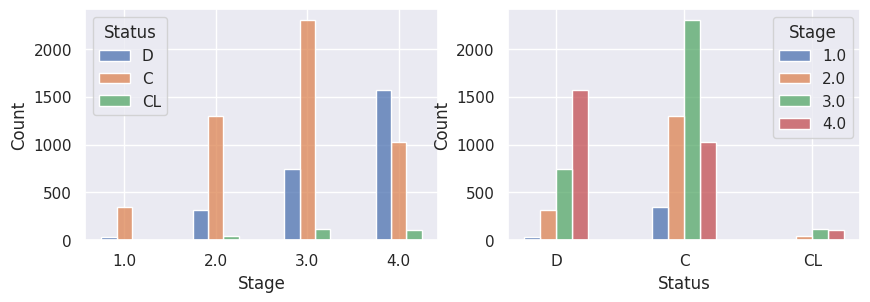

In [ ]:
for var in quali_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(
        df,
        x=df[var],
        hue=target_as_str,
        multiple="dodge",
        shrink=0.5,
        ax=ax[0],
    )

    sns.histplot(
        df,
        hue=df[var],
        x=target_as_str,
        multiple="dodge",
        shrink=0.5,
        ax=ax[1],
    )

    plt.show()

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/dataset/processed/train.csv")